# K-Means on a Mixture of Gaussians

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

### Simple 2D example

In [2]:
k = 3;
ndim = 2;
seed = 7;

X, y = make_blobs(n_samples=100, centers=k, random_state=seed)

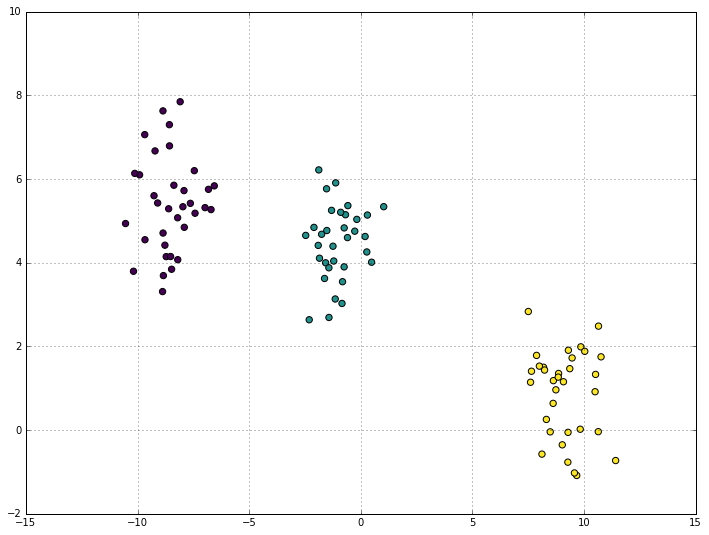

In [3]:
plt.figure(figsize=(12,9))
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap='viridis')
plt.grid()
plt.savefig('gmmdat.pdf')

Get the true centroids

In [4]:
uniq_y = np.unique(y);
true_centroids = np.zeros((k, ndim));

for i in range(k):
    true_centroids[i,:] = np.mean(X[y == uniq_y[i], :], 0);
    
print(true_centroids)

[[-8.51746442  5.39008613]
 [-1.01368631  4.47806077]
 [ 9.15116515  0.88662182]]


### Run K-Means 10 times

In [5]:
kmeans = KMeans(k)
centroids = [];
niters = 10;

In [6]:
for i in range(niters):
    kmeans = KMeans(k)
    kmeans.fit(X);
    centroids.append(kmeans.cluster_centers_);

In [7]:
for i in range(niters):
    print(centroids[i])

[[ 9.15116515  0.88662182]
 [-8.51746442  5.39008613]
 [-1.01368631  4.47806077]]
[[-8.51746442  5.39008613]
 [ 9.15116515  0.88662182]
 [-1.01368631  4.47806077]]
[[-1.01368631  4.47806077]
 [ 9.15116515  0.88662182]
 [-8.51746442  5.39008613]]
[[ 9.15116515  0.88662182]
 [-8.51746442  5.39008613]
 [-1.01368631  4.47806077]]
[[-1.01368631  4.47806077]
 [ 9.15116515  0.88662182]
 [-8.51746442  5.39008613]]
[[ 9.15116515  0.88662182]
 [-8.51746442  5.39008613]
 [-1.01368631  4.47806077]]
[[ 9.15116515  0.88662182]
 [-8.51746442  5.39008613]
 [-1.01368631  4.47806077]]
[[-8.51746442  5.39008613]
 [ 9.15116515  0.88662182]
 [-1.01368631  4.47806077]]
[[-8.51746442  5.39008613]
 [ 9.15116515  0.88662182]
 [-1.01368631  4.47806077]]
[[ 9.15116515  0.88662182]
 [-8.51746442  5.39008613]
 [-1.01368631  4.47806077]]


Measure the distance of the KMeans centroids versus True centroids

In [8]:
fro_err = np.zeros((niters,1))

for i in range(niters):
    fro_err[i] = np.linalg.norm(centroids[i]-true_centroids, "fro")

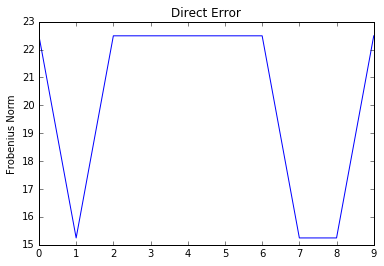

In [9]:
plt.plot(range(niters), fro_err)
plt.title("Direct Error")
plt.ylabel("Frobenius Norm")

Get the lexicographically sorted error

In [10]:
true_centroids_lex = true_centroids[np.lexsort(np.rot90(true_centroids)),:]
print(true_centroids_lex)

[[-8.51746442  5.39008613]
 [-1.01368631  4.47806077]
 [ 9.15116515  0.88662182]]


In [11]:
lex_err = np.zeros((niters,1))

for i in range(niters):
    cent_lex = centroids[i][np.lexsort(np.rot90(centroids[i])),:]
    lex_err[i] = np.linalg.norm(cent_lex-true_centroids_lex, "fro")

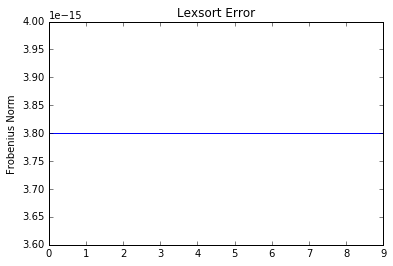

In [12]:
plt.plot(range(niters), lex_err)
plt.title("Lexsort Error")
plt.ylabel("Frobenius Norm")

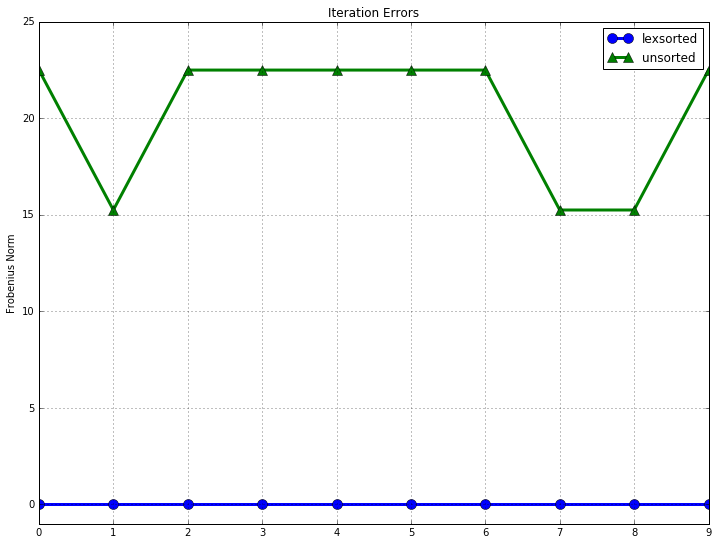

In [13]:
plt.figure(figsize=(12,9))
plt.plot(range(niters), lex_err, label="lexsorted", marker='o', linewidth=3, markersize=10)
plt.plot(range(niters), fro_err, label="unsorted", marker='^', linewidth=3, markersize=10)
plt.title("Iteration Errors")
plt.ylabel("Frobenius Norm")
plt.ylim(ymin=-1)
plt.grid()
plt.legend()
plt.show()
plt.savefig('gmmpermerr.pdf')